#About Dataset

glucose and blood pressure data to classify whether the patient has diabetes or not.
the dataset has 3 columns and 995 entries.

    glucose
    blood pressure
    diabete

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Naive-Bayes-Classification-Data.csv')
data.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [ ]:
data.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


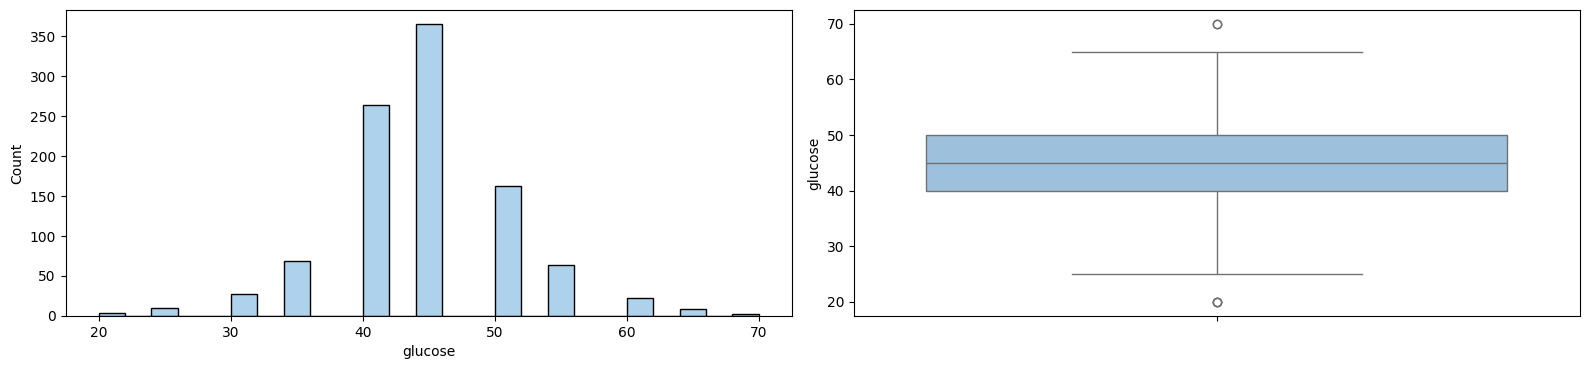

In [ ]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.histplot(data['glucose'],color='#93C2E6')
plt.subplot(2,2,2)
sns.boxplot(data['glucose'],color='#93C2E6')



plt.tight_layout()
plt.show()

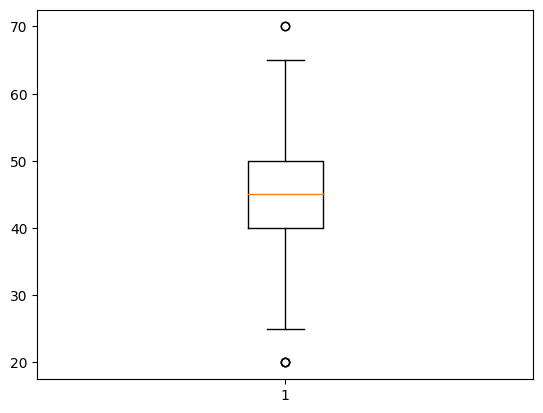

In [ ]:
plt.boxplot(data['glucose'])
plt.show()

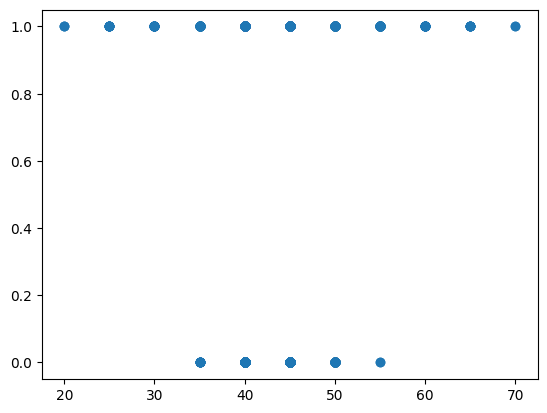

In [ ]:
plt.scatter(data['glucose'],data['diabetes'])
plt.show()

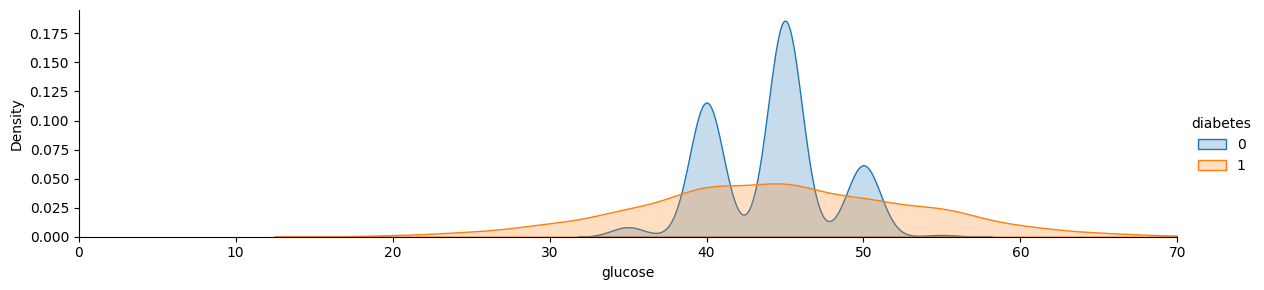

In [ ]:
fig = sns.FacetGrid(data, hue="diabetes", aspect=4)
fig.map(sns.kdeplot, 'glucose', fill=True)
oldest = data['glucose'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

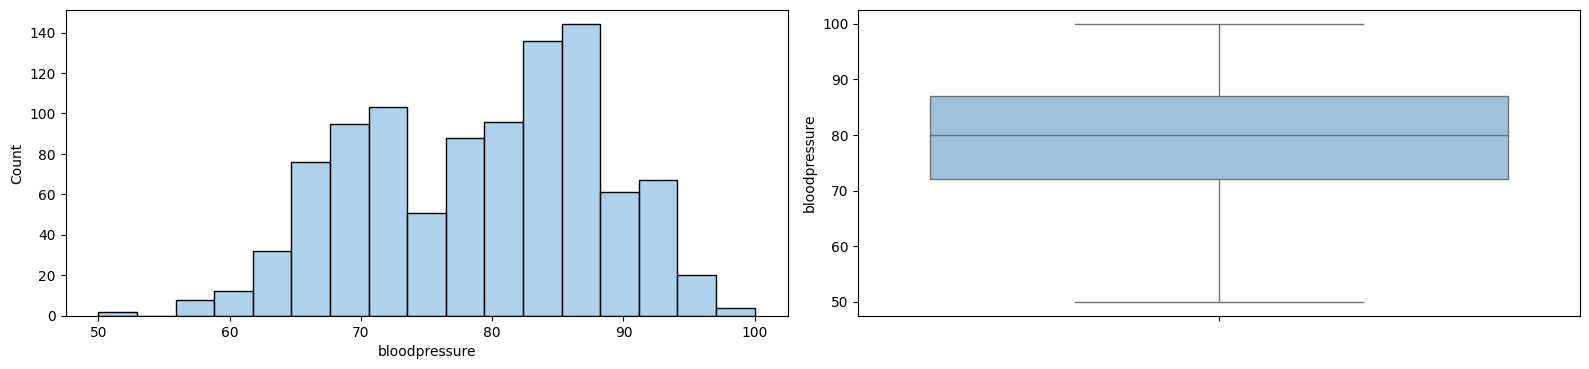

In [ ]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.histplot(data['bloodpressure'],color='#93C2E6')
plt.subplot(2,2,2)
sns.boxplot(data['bloodpressure'],color='#93C2E6')

plt.tight_layout()
plt.show()

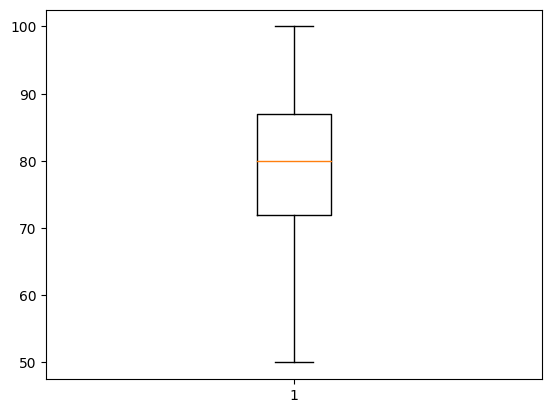

In [ ]:
plt.boxplot(data['bloodpressure'])
plt.show()

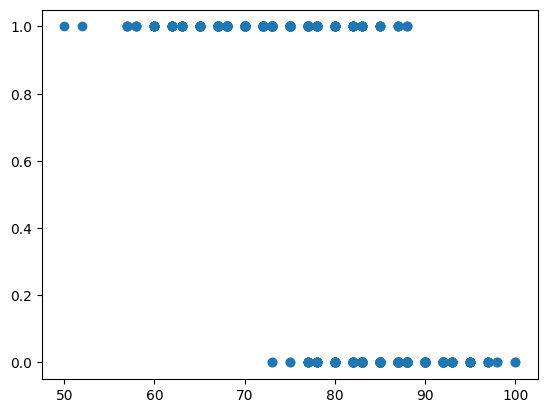

In [ ]:
plt.scatter(data['bloodpressure'],data['diabetes'])
plt.show()

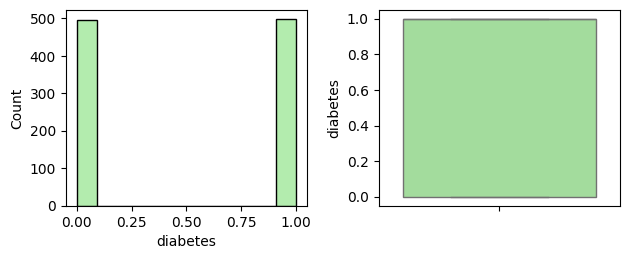

In [ ]:
plt.subplot(2,2,3)
sns.histplot(data['diabetes'],color='#9AE693')
plt.subplot(2,2,4)
sns.boxplot(data['diabetes'],color='#9AE693')
plt.tight_layout()
plt.show()

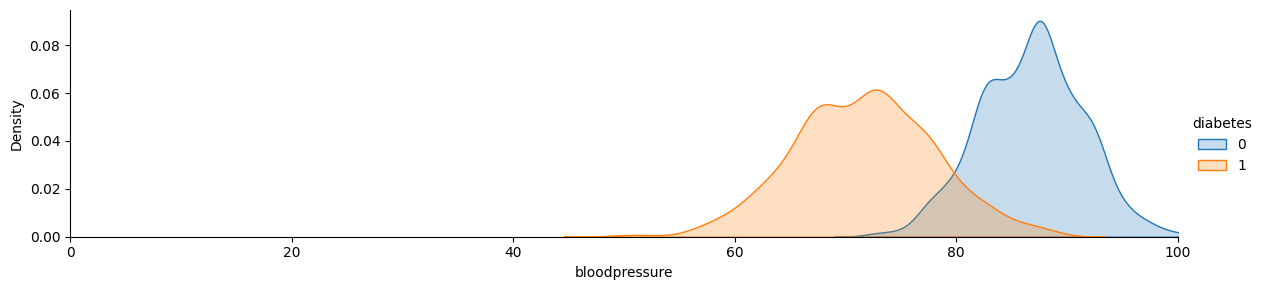

In [ ]:
fig = sns.FacetGrid(data, hue="diabetes", aspect=4)
fig.map(sns.kdeplot, 'bloodpressure', fill=True)
oldest = data['bloodpressure'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()

In [ ]:
data.corr()

,glucose,bloodpressure,diabetes
glucose,1.000000,-0.164553,0.031585
bloodpressure,-0.164553,1.000000,-0.808303
diabetes,0.031585,-0.808303,1.000000


In [ ]:
data.isnull().sum()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64

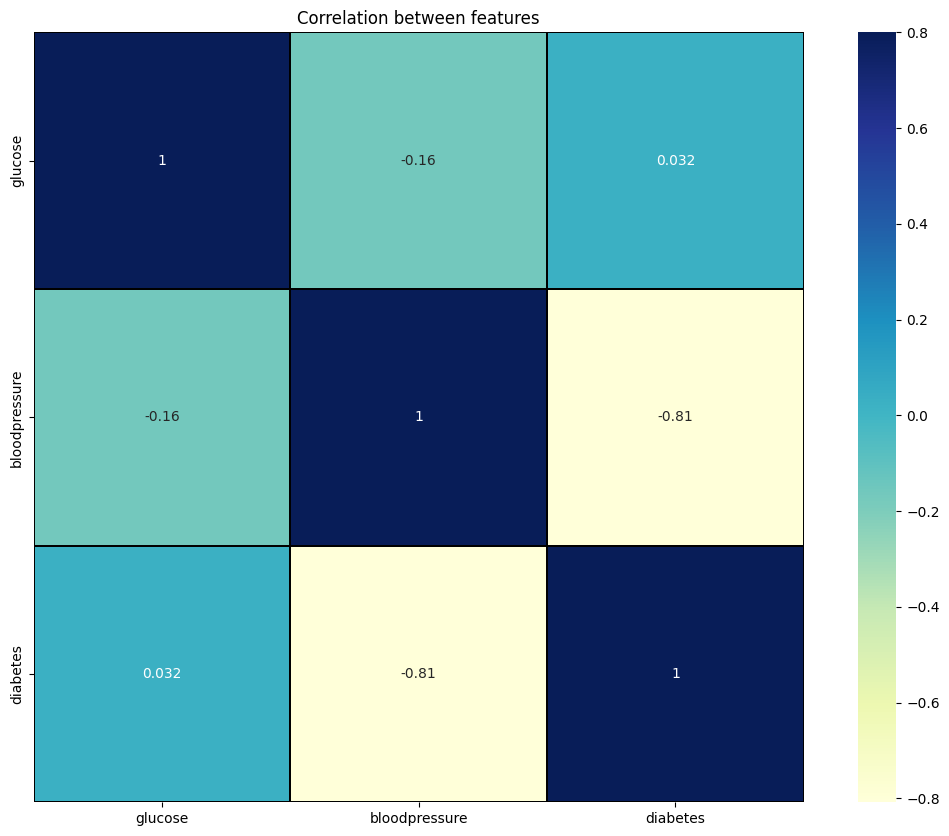

In [ ]:
corr=data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

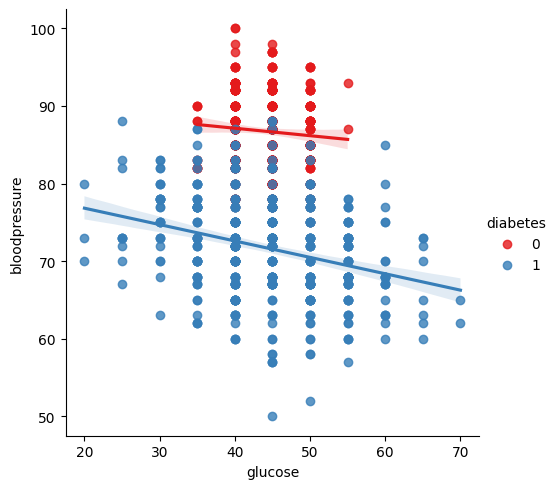

In [ ]:
g= sns.lmplot(x="glucose", y="bloodpressure", hue="diabetes", data=data, palette="Set1")

In [ ]:
diabetes_after = data["diabetes"].value_counts()

# Display the counts of unique values
print(diabetes_after)

diabetes
1    498
0    497
Name: count, dtype: int64


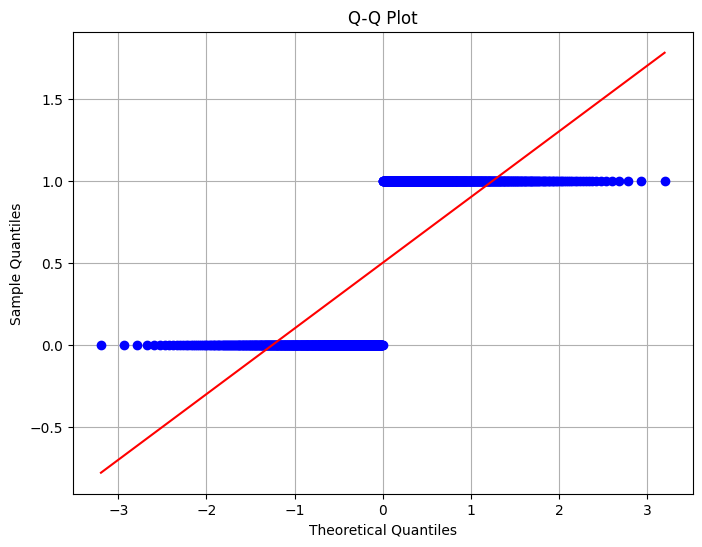

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(data['diabetes'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
data_normalized = scaler.fit_transform(data)

# Convert the normalized data array back to a DataFrame
data_normalized = pd.DataFrame(data_normalized)

# Print the first few rows of the normalized data
data_normalized.head()


,0,1,2
0,0.4,0.70,0.0
1,0.4,0.84,0.0
2,0.5,0.26,1.0
3,0.5,0.60,0.0
4,0.4,0.46,1.0


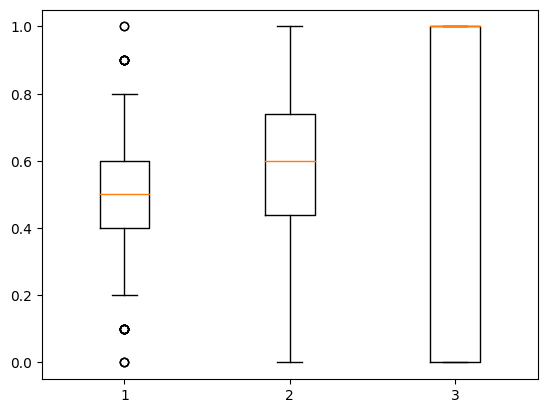

In [ ]:
plt.boxplot(data_normalized)
plt.show()

In [ ]:
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Naive_bayes = GaussianNB()
Naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_train_pred = Naive_bayes.predict(X_train)
y_test_pred = Naive_bayes.predict(X_test)

In [ ]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.9346733668341709
Testing Accuracy: 0.9296482412060302


In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R2:", train_r2)
print("Testing R2:", test_r2)

Training MSE: 0.06532663316582915
Testing MSE: 0.07035175879396985
Training R2: 0.7386340674883816
Testing R2: 0.7173868938932846


Confusion Matrix is : 
 [[86  7]
 [ 7 99]]


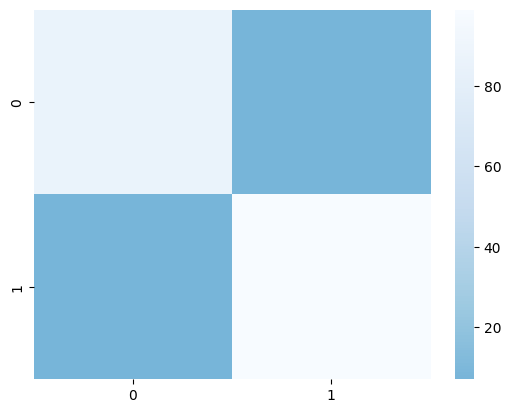

In [ ]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()

In [ ]:
#Calculating classification Report :
ClassificationReport = classification_report(y_test,y_test_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        93
           1       0.93      0.93      0.93       106

    accuracy                           0.93       199
   macro avg       0.93      0.93      0.93       199
weighted avg       0.93      0.93      0.93       199



In [ ]:
naive_batesModel = MultinomialNB()
naive_batesModel.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_train_pred = Naive_bayes.predict(X_train)
y_test_pred = Naive_bayes.predict(X_test)

In [ ]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.9346733668341709
Testing Accuracy: 0.9296482412060302


In [ ]:
ClassificationReport = classification_report(y_test,y_test_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        93
           1       0.93      0.93      0.93       106

    accuracy                           0.93       199
   macro avg       0.93      0.93      0.93       199
weighted avg       0.93      0.93      0.93       199

